## If you are using Drive run the below cell

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Change the root dir

In [2]:
cd drive/MyDrive/Font_Recognition/

/content/drive/MyDrive/Font_Recognition


In [3]:
!pwd

/content/drive/MyDrive/Font_Recognition


## Import packages

In [4]:
from my_utils.visualization import my_imshow
from my_utils.visualization import show_misclass
from datasets import FontData
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
from my_models import Ensamble_Model
import torch

##Show some images of train dataset

Train DatSet 
Number of Samples is: 15009



/content/drive/MyDrive/Font_Recognition/datasets/dataset.py:39: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  image = torch.from_numpy(np.asarray(image)).float().div(255)


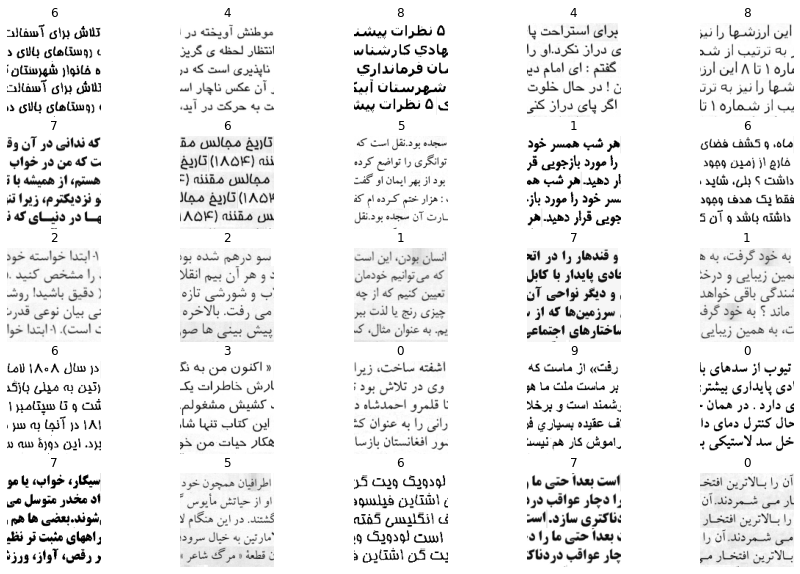

In [5]:

train_root_path = '/content/drive/MyDrive/Font_Recognition/Data/Train'
class_names = {0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9}
db = FontData(root_path=train_root_path, for_data='Train')
dl = DataLoader(db, batch_size=1, shuffle=True)
print(db)
my_imshow(dl, 5, 5, class_names)

## Train model

In [10]:
!python train.py

Train DatSet 
Number of Samples is: 15009

Validation DatSet 
Number of Samples is: 1000

--------- Training in Cuda Mode ----------
  0% 0/118 [00:00<?, ?it/s]
Epoch: 1/10
----------
  0% 0/118 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are re

## Test model

In [12]:
!python test.py 

Test DatSet 
Number of Samples is: 5024

--------- Cuda Mode ----------
Predicting...
  0% 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100% 79/79 [00:33<00:00,  2.81it/s]
Testing completed in 0m 34s
The Accuracy of the model on test data is:0.8863455414012739
[[410  13  37   0   2  30   0   2   0   6]
 [ 12 409  42   5   6  17   1   5   1   2]
 [ 23  68 358   3   8  18   0   6   6  10]
 [  3   1   2 478   1   0   0   0  23   6]
 [  4   0   4   1 464   8   1   1   1  16]
 [ 51  19  22   3   2 411   1   0   0   1]
 [  0   2   0   2   0   0 496   0   0   0]
 [  0   5   2   0   0   0   1 492   0   0]
 [  2   1   3  

## Show some miss classified images

In [9]:
my_model = Ensamble_Model(transfer_learning=False)
state_dict = torch.load('/content/drive/MyDrive/Font_Recognition/vgg_best_model.pth')
my_model.load_state_dict(state_dict)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
data_transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.Grayscale (3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]) 

test_root_path = '/content/drive/MyDrive/Font_Recognition/Data/Test'
class_names = {0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9}
db = FontData(root_path=test_root_path, transform=data_transform, for_data='Test')
dl = DataLoader(db, batch_size=64, shuffle=True)
print(db)

Test DatSet 
Number of Samples is: 5024



IndexError: ignored

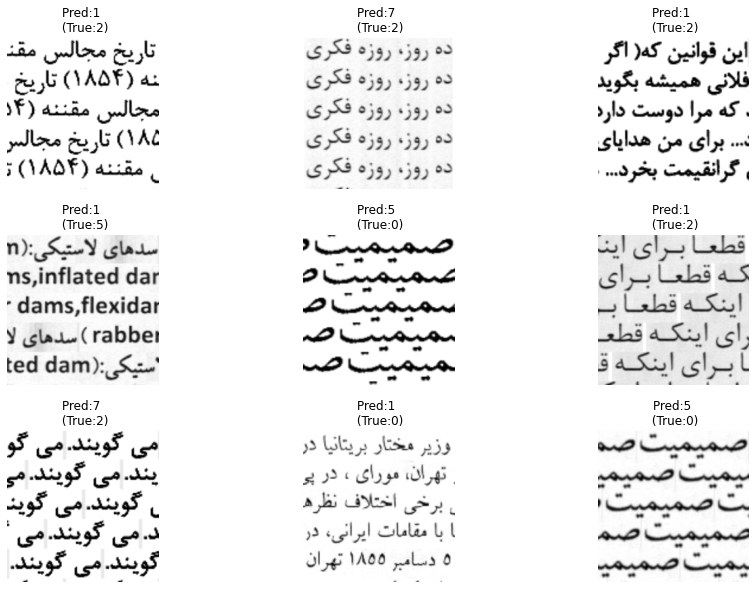

In [ ]:
show_misclass(my_model, dl, class_names, device, ncols=3, nrows=3)